In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
IMG_SIZE=224
BATCH_SIZE=32

In [ ]:

train_datagen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2)
train_generator=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/fru',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)
val_generator=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/fru',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)
test_datagen=ImageDataGenerator(rescale=1./255)
test_generator=test_datagen.flow_from_directory(
    '/content/drive/MyDrive/fru',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 100 images belonging to 3 classes.
Found 25 images belonging to 3 classes.
Found 125 images belonging to 3 classes.


In [ ]:
model=keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(68,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(3,activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_generator,validation_data=test_generator,epochs=5)

Epoch 1/5
4/4 [==============================] - 101s 25s/step - loss: 2.9033 - accuracy: 0.4000 - val_loss: 2.3460 - val_accuracy: 0.3600
Epoch 2/5
4/4 [==============================] - 26s 8s/step - loss: 1.0415 - accuracy: 0.4700 - val_loss: 0.9435 - val_accuracy: 0.5680
Epoch 3/5
4/4 [==============================] - 26s 7s/step - loss: 0.8869 - accuracy: 0.5500 - val_loss: 0.7230 - val_accuracy: 0.8480
Epoch 4/5
4/4 [==============================] - 26s 7s/step - loss: 0.6147 - accuracy: 0.8800 - val_loss: 0.4155 - val_accuracy: 0.8640
Epoch 5/5
4/4 [==============================] - 26s 8s/step - loss: 0.4322 - accuracy: 0.8500 - val_loss: 0.2821 - val_accuracy: 0.8960


In [ ]:
model.save("MODEL1.h5","label.txt")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 149ms/step
[[0.9426986  0.04480238 0.01249904]]
1/1 [==============================] - 0s 47ms/step
predicted_class  banana


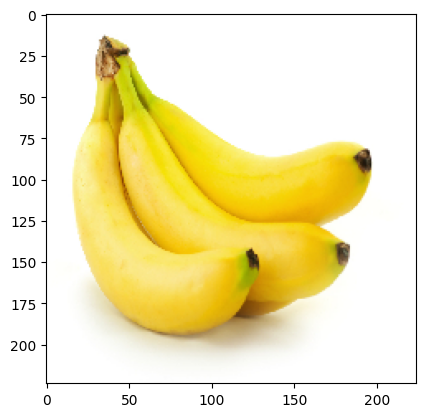

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
model=load_model('/content/MODEL1.h5')
test_image_path='/content/drive/MyDrive/fru/banana fruit/Image_1.jpg'
img=image.load_img(test_image_path,target_size=(224,224))
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array /=255.
plt.imshow(img)
prediction=model.predict(img_array)
print(prediction)
classes = { 0:"banana",1:"grapes",2:"strawberry"}
prediction=model.predict(img_array)
predicted_class_index = np.argmax(prediction[0])
print("predicted_class ",classes[predicted_class_index])
#print(f"Predicted class: {predicted_class}")

